In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("data/H1.csv")

In [98]:
df['canceled'] = df.IsCanceled.apply(lambda x: True if x == 1 else False)

In [99]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,canceled
0,0,342,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,False
1,0,737,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,False
2,0,7,2015,July,27,1,0,1,1,0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,False
3,0,13,2015,July,27,1,0,1,1,0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,False
4,0,14,2015,July,27,1,0,2,2,0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,False


In [100]:
df['year_week'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(('%02d' % row['ArrivalDateWeekNumber'])), axis=1)
df['year_month'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(row['ArrivalDateMonth']), axis=1)
df['dt'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(row['ArrivalDateMonth']) + "-" + str(row['ArrivalDateDayOfMonth']), axis=1)

In [101]:
pd.DataFrame(df.groupby(['year_week'])['IsCanceled'].sum())

,IsCanceled
year_week,
2015-27,41
2015-28,48
2015-29,87
2015-30,74
2015-31,101
...,...
2017-31,173
2017-32,140
2017-33,182


In [102]:
df_tf = pd.DataFrame({"data": df.IsCanceled.values}, index=df.year_week)

In [103]:
ti = df_tf.groupby(df_tf.index).sum()

In [104]:
ti

,data
year_week,
2015-27,41
2015-28,48
2015-29,87
2015-30,74
2015-31,101
...,...
2017-31,173
2017-32,140
2017-33,182


In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [106]:
result = seasonal_decompose(ti, period = 52)

In [107]:
seasonal = result.seasonal
residual = result.resid
trend = result.trend

Text(0, 0.5, 'Residual')

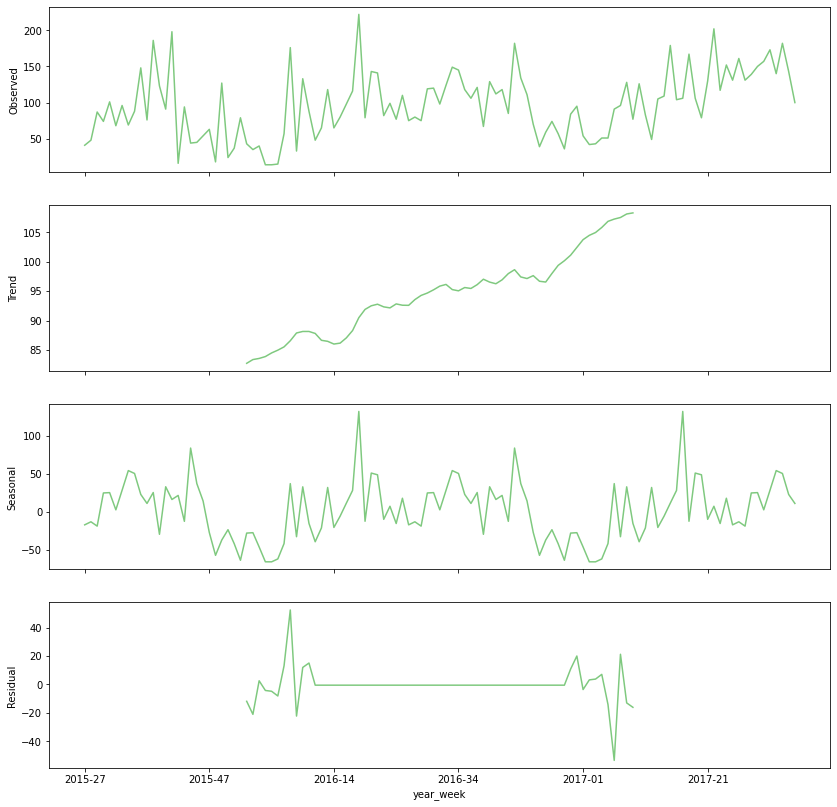

In [108]:
plt.rc("figure", figsize=(14,8))
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14,14))
result.observed.plot(ax=axes[0], legend=False, colormap="Accent")
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, colormap="Accent")
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, colormap="Accent")
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, colormap="Accent")
axes[3].set_ylabel('Residual')

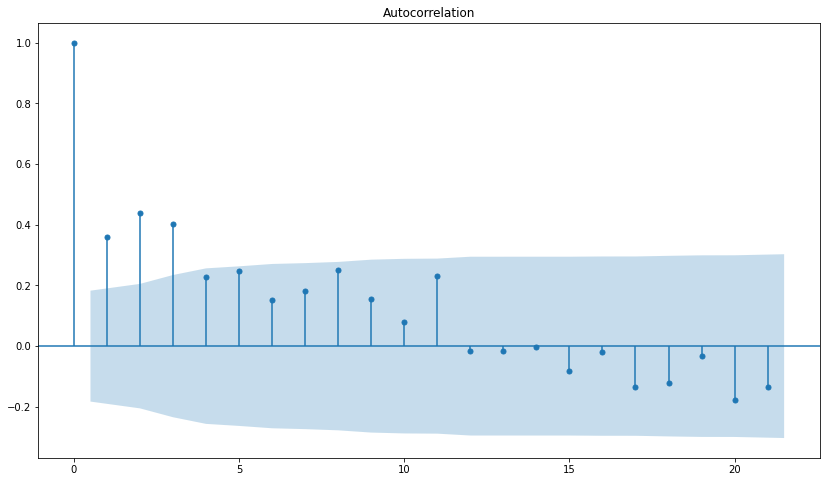

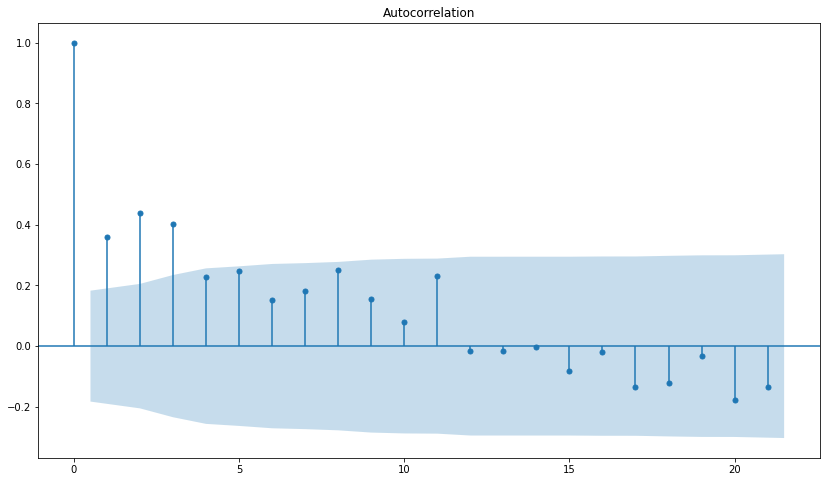

In [109]:
plot_acf(ti)

In [110]:
from statsmodels.tsa.stattools import acf, pacf

In [111]:
data_acf = acf(ti, nlags=100)

/Users/z001hqv/.pyenv/versions/3.8.1/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [112]:
data_acf[:5]

array([1.        , 0.36055904, 0.43832205, 0.40127022, 0.22826716])

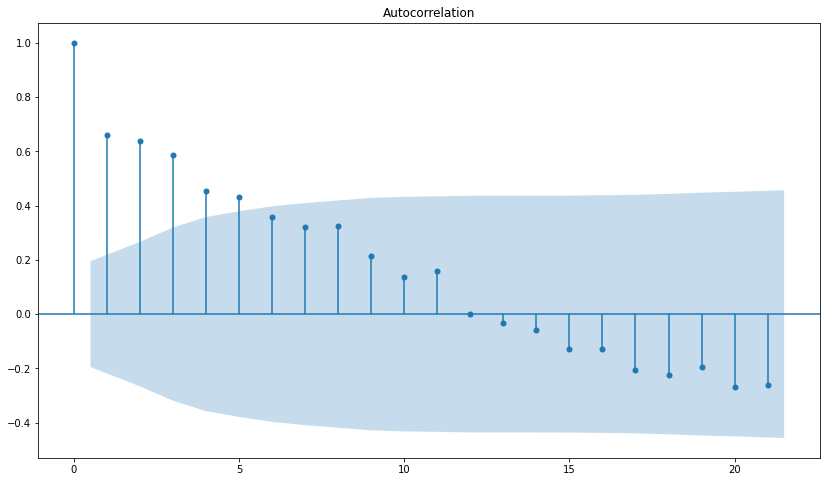

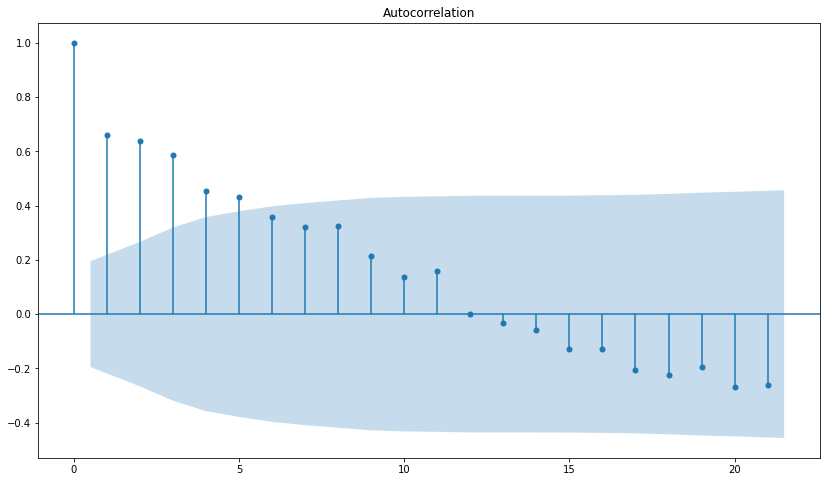

In [113]:
plot_acf(data_acf)

In [114]:
data_pacf = pacf(ti, nlags=50)

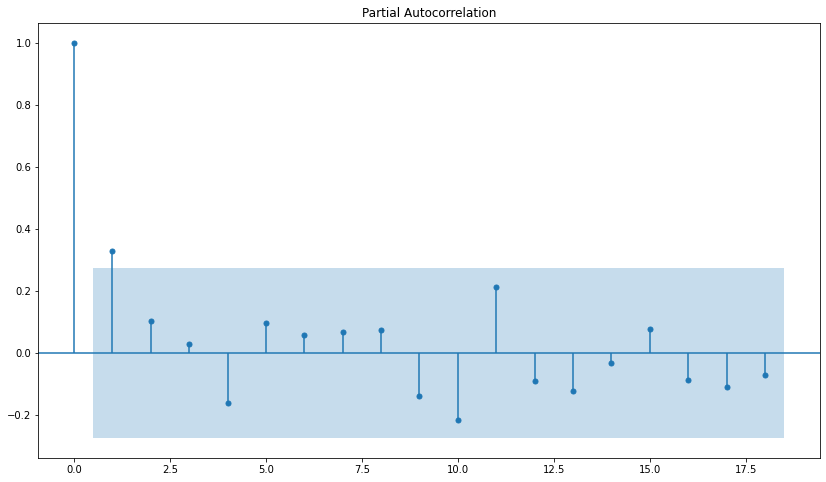

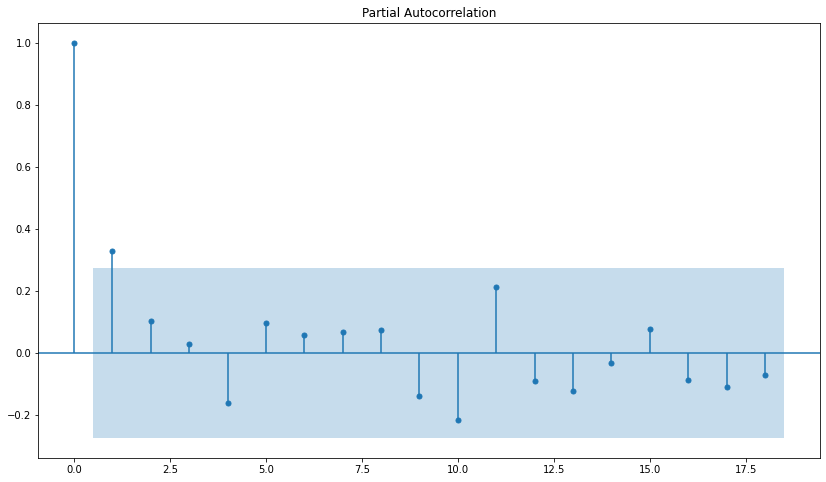

In [115]:
plot_pacf(data_pacf)

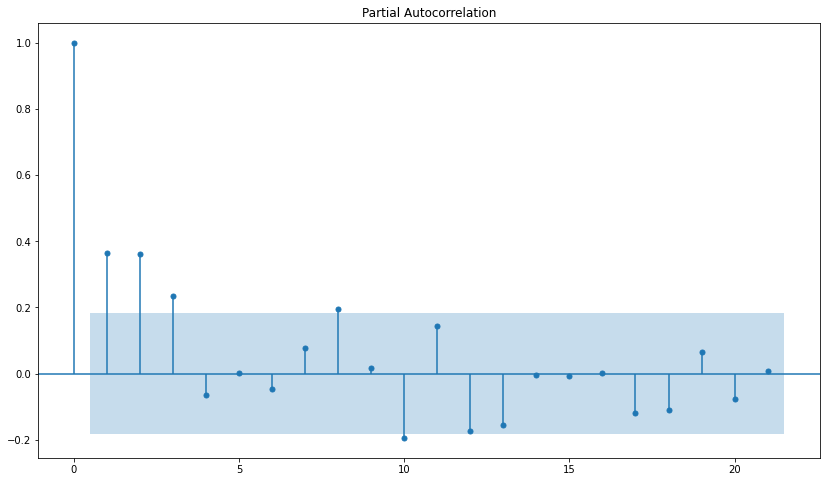

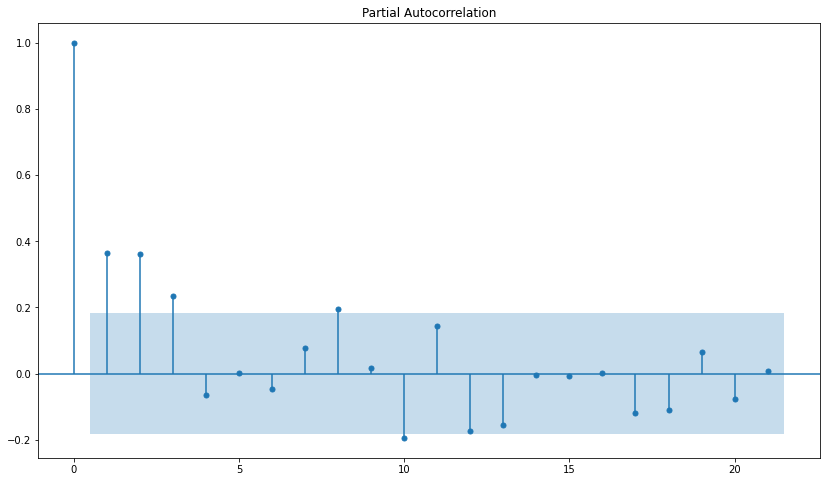

In [116]:
plot_pacf(ti)

In [117]:
ti_ma = ti.copy()

In [118]:
ti_ma["sma4"] = ti_ma.data.rolling(4).mean()

In [119]:
ti_ma

,data,sma4
year_week,,
2015-27,41,NaN
2015-28,48,NaN
2015-29,87,NaN
2015-30,74,62.50
2015-31,101,77.50
...,...,...
2017-31,173,154.75
2017-32,140,155.00
2017-33,182,163.00


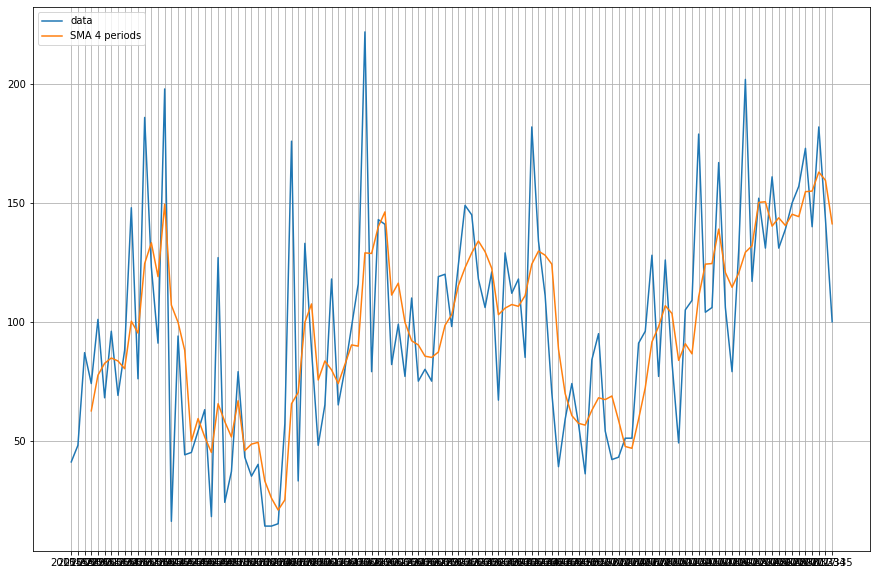

In [120]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(ti_ma['data'],label='data')
plt.plot(ti_ma['sma4'],label='SMA 4 periods')
plt.legend(loc=2)

In [121]:
train = ti[:100]

In [122]:
test = ti[-15:]

In [123]:
len(train) + len(test)

115

In [124]:
ti

,data
year_week,
2015-27,41
2015-28,48
2015-29,87
2015-30,74
2015-31,101
...,...
2017-31,173
2017-32,140
2017-33,182


In [125]:
test

,data
year_week,
2017-21,130
2017-22,202
2017-23,117
2017-24,152
2017-25,131
2017-26,161
2017-27,131
2017-28,139
2017-29,150


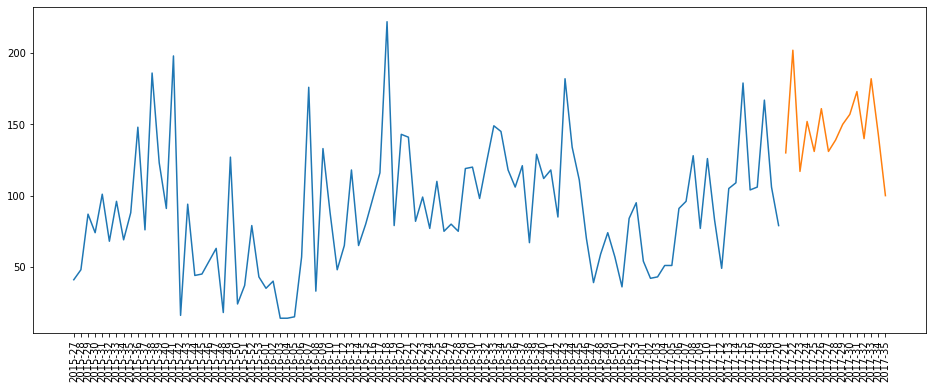

In [130]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.plot(train)
plt.plot(test)

In [131]:
from pmdarima.arima import auto_arima

In [132]:
arima_model = auto_arima(train, start_p=0, start_q=0, max_p=10, 
                         max_q=10, start_P=0, start_Q=0, max_P=10, 
                         max_Q=10, m=51, stepwise=True, seasonal=True, 
                         information_criterion='bic', trace=True, d=1, D=1, 
                         error_action='warn', suppress_warnings=True, random_state = 20, 
                         n_fits=30)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[51]             : BIC=553.656, Time=0.32 sec
 ARIMA(1,1,0)(1,1,0)[51]             : BIC=inf, Time=4.77 sec
 ARIMA(0,1,1)(0,1,1)[51]             : BIC=inf, Time=3.08 sec
 ARIMA(0,1,0)(1,1,0)[51]             : BIC=inf, Time=4.00 sec
 ARIMA(0,1,0)(0,1,1)[51]             : BIC=inf, Time=4.32 sec
 ARIMA(0,1,0)(1,1,1)[51]             : BIC=560.999, Time=6.79 sec
 ARIMA(1,1,0)(0,1,0)[51]             : BIC=539.721, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[51]             : BIC=inf, Time=2.77 sec
 ARIMA(1,1,0)(1,1,1)[51]             : BIC=547.022, Time=6.31 sec
 ARIMA(2,1,0)(0,1,0)[51]             : BIC=536.643, Time=0.30 sec
 ARIMA(2,1,0)(1,1,0)[51]             : BIC=inf, Time=7.34 sec
 ARIMA(2,1,0)(0,1,1)[51]             : BIC=inf, Time=5.79 sec
 ARIMA(2,1,0)(1,1,1)[51]             : BIC=544.109, Time=8.17 sec
 ARIMA(3,1,0)(0,1,0)[51]             : BIC=540.514, Time=0.53 sec
 ARIMA(2,1,1)(0,1,0)[51]             : BIC=533.803, Time=1.21

In [134]:
prediction = pd.DataFrame(arima_model.predict(n_periods=15), index=test.index)

In [136]:
prediction.columns = ['predicted_cancellations']

In [137]:
prediction = prediction['predicted_cancellations']

In [138]:
prediction

year_week
2017-21    112.283574
2017-22     90.283574
2017-23    123.283574
2017-24     88.283574
2017-25     93.283574
2017-26     88.283574
2017-27    132.283574
2017-28    133.283574
2017-29    111.283574
2017-30    137.283574
2017-31    162.283574
2017-32    158.283574
2017-33    131.283574
2017-34    119.283574
2017-35    134.283574
Name: predicted_cancellations, dtype: float64

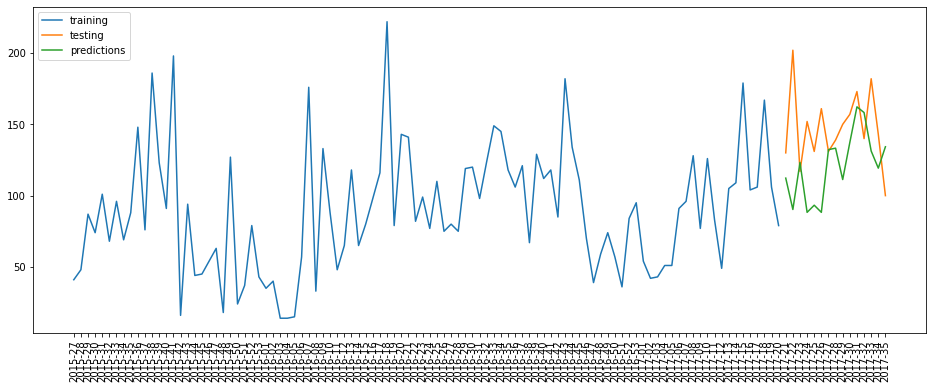

In [140]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.plot(train, label="training")
plt.plot(test, label="testing")
plt.plot(prediction, label="predictions")
plt.legend(loc="upper left")

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
mse = mean_squared_error(test, prediction)

In [144]:
rmse = np.sqrt(mse)

In [145]:
rmse

44.933319784705475